In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
from datetime import datetime

In [2]:
date = datetime.now()
date = date.strftime("%d/%m/%Y_%H:%M")
arq = datetime.now()
arq = arq.strftime("%d_%m_%Y_%H_%M")


In [3]:
Npontos = 100 #Tempo de dados 200
features = 6
lista_ativ = 18
colunas_interesse = []
for i in range(lista_ativ):
    colunas_interesse.append('atividade_'+str(i))

In [4]:
dataset = pd.read_csv('Datasets/normalizado.csv')
dataset

In [ ]:
for coluna in colunas_interesse:
    dataset[coluna] = dataset[coluna].astype(int)

In [ ]:
#remover as pessoas não muito úteis:
# Definindo os valores a serem deletados
valores_para_deletar = [1616, 1618, 1637, 1638, 1639, 1640]

# Filtrando o DataFrame para excluir essas linhas
dataset_filtrado = dataset[~dataset["pessoa_x"].isin(valores_para_deletar)]

mapeamento = {
    1650: 1637,
    1649: 1638,
    1648: 1639,
    1647: 1640,
    1646: 1616,
    1645: 1618
}

# Substituindo os valores de pessoa_x conforme o mapeamento
dataset['pessoa_x'] = dataset['pessoa_x'].replace(mapeamento)

In [ ]:
# Inicializar uma lista para armazenar DataFrames filtrados
dfs_filtrados = []

# Obter a lista de colunas de atividades (supondo que todas as atividades estão nas colunas 1 em diante)

# Iterar sobre cada atividade
for atividade in colunas_interesse:
    # Filtrar o DataFrame para apenas as linhas onde a atividade é True
    df_atividade = dataset[dataset[atividade] == True]
    
    # Garantir que estamos pegando apenas as 3500 primeiras linhas
    df_atividade_filtrado = df_atividade.groupby('pessoa_x').head(3500)
    
    # Adicionar o DataFrame filtrado à lista
    dfs_filtrados.append(df_atividade_filtrado)

# Concatenar todos os DataFrames filtrados em um único DataFrame
df_balanceado = pd.concat(dfs_filtrados).reset_index(drop=True)

# Exibir o DataFrame balanceado
df_balanceado

,pessoa_x,tempo,acelerômetro_X,acelerômetro_Y,acelerômetro_Z,giroscópio_X,giroscópio_Y,giroscópio_Z,atividade_0,atividade_1,...,atividade_8,atividade_9,atividade_10,atividade_11,atividade_12,atividade_13,atividade_14,atividade_15,atividade_16,atividade_17
0,1600,90426757696641,0.616106,0.792659,0.903685,0.216118,-0.658304,-0.223939,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1600,90426807196641,0.371614,0.786319,0.789384,0.261602,-0.390209,-0.044416,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1600,90426856696641,0.307257,0.793112,0.768011,0.062944,-0.118576,-0.145535,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1600,90426906196641,0.445166,0.623742,1.104409,0.042208,0.189840,-0.118424,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1600,90426955696641,0.571838,0.854701,1.483555,0.064282,0.498256,-0.011442,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827995,1637,2426175822786532,0.824800,-0.166019,0.336216,1.460415,-0.403849,-1.277200,0,0,...,0,0,0,0,0,0,0,0,0,1
2827996,1637,2426175872777362,1.017533,0.155512,0.721866,1.036344,-0.217102,-0.922550,0,0,...,0,0,0,0,0,0,0,0,0,1
2827997,1637,2426175922768192,1.092446,0.194006,0.740452,0.418298,-0.198710,-0.526134,0,0,...,0,0,0,0,0,0,0,0,0,1
2827998,1637,2426175972759022,1.260321,-0.389732,0.353872,0.065797,0.262500,0.039548,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
b = ["pessoa_x"]
for i in range(18):
    b.append("atividade_"+str(i))
for i in range(1600,1645):
    a = df_balanceado[df_balanceado["pessoa_x"] == i]
    print(a[b].value_counts())


pessoa_x  atividade_0  atividade_1  atividade_2  atividade_3  atividade_4  atividade_5  atividade_6  atividade_7  atividade_8  atividade_9  atividade_10  atividade_11  atividade_12  atividade_13  atividade_14  atividade_15  atividade_16  atividade_17
1600      0            0            0            0            0            0            0            0            0            0            0             0             0             0             0             0             0             1               3500
                                                                                                                                                                                                                                1             0               3500
                       1            0            0            0            0            0            0            0            0            0             0             0             0             0             0             0      

In [ ]:
def cria_IN_OUT(data, janela, features):
    OUT_indices = np.arange(janela, len(data), janela)
    OUT = data[OUT_indices]

    IN_indices = [range(i-janela, i) for i in OUT_indices]
    IN = data[np.array(IN_indices).flatten()]
    IN = np.reshape(IN, (len(OUT), janela, features))
    IN_final = IN[:, :, :]
    return IN_final
#data = quantidade total de dados
#janela = número de pontos de cada série
#features = quais tipos de dados cada ponto recebe

In [ ]:
featuresX = ['acelerômetro_X', 'acelerômetro_Y', 'acelerômetro_Z', 'giroscópio_X', 'giroscópio_Y', 'giroscópio_Z']
colunas_label = []
for i in range(lista_ativ):
    colunas_label.append('atividade_'+str(i))

In [ ]:
def Treino():
    treino = np.empty((0, 100, 6), dtype=float)
    label = np.empty((0,18))
    for atividade in colunas_interesse:
        total = df_balanceado[df_balanceado[atividade] == 1]
        linhasTreino = int(0.8 * len(total))
        atividadeTreino = total.head(linhasTreino)
        arrayTreino = atividadeTreino[featuresX].values
        reshape = cria_IN_OUT(arrayTreino, 100, 6)
        arraylabel = atividadeTreino[colunas_interesse].values
        treino = np.concatenate([treino, reshape])
        label = np.concatenate([label, arraylabel])
    return treino, label
        

In [ ]:
TrainX, TrainY = Treino()
TestX, TestY = Teste()

In [126]:
def Teste():
    teste = np.empty((0, 100, 6), dtype=float)
    label = np.empty((0,18))
    for atividade in colunas_interesse:
        total = df_balanceado[df_balanceado[atividade] == 1]
        linhasTeste = int(0.2 * len(total))
        atividadeTeste = total.tail(linhasTeste)
        arrayTeste = atividadeTeste[featuresX].values
        reshape = cria_IN_OUT(arrayTeste, 100, 6)
        arraylabel = atividadeTeste[colunas_interesse].values
        teste = np.concatenate([teste, reshape])
        label = np.concatenate([label, arraylabel])
    return teste, label

In [127]:
def treino_teste(atividade):
    X_parte_train, X_temp, Y_parte_train, Y_temp = train_test_split(atividade[featuresX], atividade[colunas_label], test_size=0.3, random_state=42, shuffle=False)
    X_parte_test, X_parte_val, Y_parte_test, Y_parte_val = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42, shuffle=False)
    array_treino = X_parte_train.values
    array_teste = X_parte_test.values
    array_val = X_parte_val.values
    final_treino_X = cria_IN_OUT(array_treino, Npontos, len(featuresX))
    final_teste_X = cria_IN_OUT(array_teste, Npontos, len(featuresX))
    final_val_X = cria_IN_OUT(array_val, Npontos, len(featuresX))
    array_label_treino = Y_parte_train[colunas_interesse].values
    array_label_teste = Y_parte_test[colunas_interesse].values
    array_label_val = Y_parte_val[colunas_interesse].values
    final_treino_Y = f(array_label_treino, Npontos)
    final_teste_Y = f(array_label_teste, Npontos)
    final_val_Y = f(array_label_val, Npontos)
    label_treino = np.concatenate([trainY, final_treino_Y])
    label_val = np.concatenate([valY, final_val_Y])
    val = np.concatenate([valX, final_val_X])
    treino = np.concatenate([trainX, final_treino_X])
    teste = np.concatenate([final_teste_X, testX])
    label_teste = np.concatenate([final_teste_Y, testY])
    return treino, label_treino, val, label_val, teste, label_teste


In [128]:
def f(x, n):
    y = np.array([-1]*x.shape[1])
    y = np.vstack([y,x[0]])
    y = np.delete(y, (0), axis=0)
    for i, linha in enumerate(x):
        if i == 0: continue
        if i % n == 0:
            y = np.vstack([y, linha])
    y = y[:-1]
    return y

In [129]:
colunas_interesse

['atividade_0',
 'atividade_1',
 'atividade_2',
 'atividade_3',
 'atividade_4',
 'atividade_5',
 'atividade_6',
 'atividade_7',
 'atividade_8',
 'atividade_9',
 'atividade_10',
 'atividade_11',
 'atividade_12',
 'atividade_13',
 'atividade_14',
 'atividade_15',
 'atividade_16',
 'atividade_17']

In [143]:
trainX = np.empty((0, Npontos, len(featuresX)), dtype=float)
valX = trainX.copy()
testX = trainX.copy()
trainY = np.empty((0, len(colunas_label)), dtype=float)
valY = trainY.copy()
testY = trainY.copy()
for atividade in colunas_label:
    trainX, trainY, valX, valY, testX, testY = treino_teste(df_balanceado[df_balanceado[atividade] == 1])
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
'''print(valX.shape)
print(valY.shape)'''

(19786, 100, 6)
(19786, 18)
(5674, 100, 6)
(5674, 18)


'print(valX.shape)\nprint(valY.shape)'

In [140]:
TrainX.shape

(22606, 100, 6)

In [111]:
print("Shape do conjunto de treino (X):", trainX.shape)
print("Shape do conjunto de treino (Y):", trainY.shape)
'''print("Shape do conjunto de teste (X):", testX.shape)
print("Shape do conjunto de teste (Y):", testY.shape)'''
print("Shape do conjunto de validação (X):", valX.shape)
print("Shape do conjunto de validação (Y):", valY.shape)


Shape do conjunto de treino (X): (22209, 100, 6)
Shape do conjunto de treino (Y): (22209, 18)
Shape do conjunto de validação (X): (3133, 100, 6)
Shape do conjunto de validação (Y): (3133, 18)


In [112]:
def teste_label(dados, label):
    errados = []
    errado = 0;
    for x in range(len(label)):
        for i in range(18):
            if label[x][i] == 1:
                a = dataset[(dataset["acelerômetro_X"] == dados[x][0][0]) & (dataset["acelerômetro_Y"] == dados[x][0][1]) & (dataset["acelerômetro_Z"] == dados[x][0][2]) & (dataset["giroscópio_X"] == dados[x][0][3]) & (dataset["giroscópio_Y"] == dados[x][0][4]) & (dataset["giroscópio_Z"] == dados[x][0][5])]
                a = a["atividade_" + str(i)].values[0]
                if(a != 1):
                    errado = errado+1
                    errados.append(x)
    print(errado)
    print(errados)



In [113]:
teste_label(trainX, trainY)
teste_label(testX, testY)
'''teste_label(valX, valY)'''

KeyboardInterrupt: 

In [131]:
# taxa de aprendizado padrão ADAM 0.001
optimizer = optimizers.Adam()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [132]:
def cria_LSTM(hidden_units, dense_units, input_shape, activation, optimizer):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=True))
  model.add(tf.keras.layers.LSTM(activation=activation[2], units=160))
  model.add(tf.keras.layers.Dropout(rate=0.3))
  model.add(tf.keras.layers.Dense(units=dense_units, activation=activation[1]))
  model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
  return model

model = cria_LSTM(hidden_units=64, dense_units=lista_ativ, input_shape=(Npontos, len(featuresX)), activation=['tanh', 'softmax','sigmoid'], optimizer=optimizer)


In [133]:
def reset_model():
  global model
  model = cria_LSTM(hidden_units=64, dense_units=lista_ativ, input_shape=(Npontos, len(featuresX)), activation=['tanh', 'softmax','sigmoid'], optimizer=tf.keras.optimizers.Adam())

In [144]:
reset_model()
history = model.fit(trainX, trainY, epochs = 50, batch_size = 50, verbose = 1,  validation_split=0.2, use_multiprocessing=True, shuffle=True)

Epoch 1/50
317/317 [==============================] - 42s 126ms/step - loss: 2.0683 - accuracy: 0.2611 - val_loss: 6.5526 - val_accuracy: 0.0000e+00
Epoch 2/50
317/317 [==============================] - 37s 118ms/step - loss: 1.6231 - accuracy: 0.3915 - val_loss: 7.3366 - val_accuracy: 0.0493
Epoch 3/50
317/317 [==============================] - 38s 119ms/step - loss: 1.4536 - accuracy: 0.4622 - val_loss: 7.8142 - val_accuracy: 0.1013
Epoch 4/50
317/317 [==============================] - 38s 119ms/step - loss: 1.2934 - accuracy: 0.5150 - val_loss: 8.1651 - val_accuracy: 0.1392
Epoch 5/50
317/317 [==============================] - 38s 119ms/step - loss: 1.1895 - accuracy: 0.5568 - val_loss: 8.4429 - val_accuracy: 0.1281
Epoch 6/50
317/317 [==============================] - 38s 119ms/step - loss: 1.1130 - accuracy: 0.5862 - val_loss: 8.7660 - val_accuracy: 0.1342
Epoch 7/50
317/317 [==============================] - 38s 118ms/step - loss: 1.0275 - accuracy: 0.6242 - val_loss: 9.0423 - va

In [20]:
history

C:\Users\rapha\AppData\Local\Temp\ipykernel_3132\841215041.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


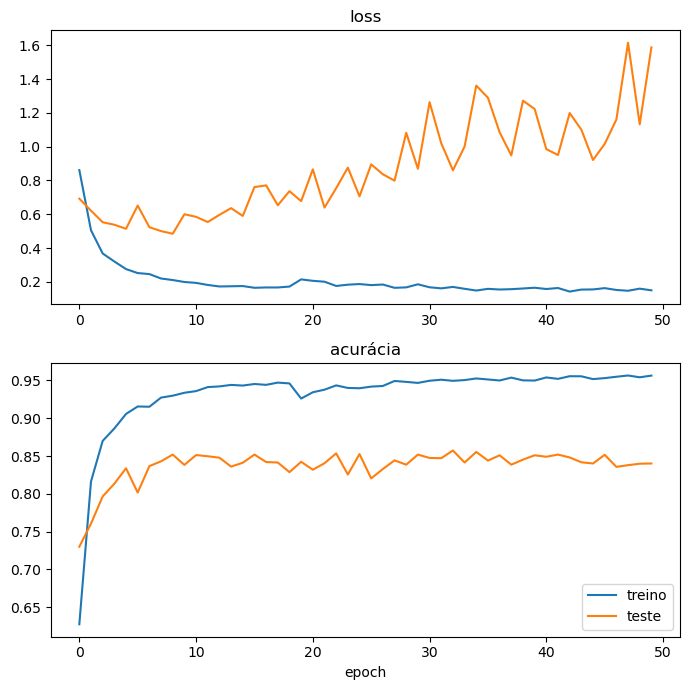

In [21]:
date = datetime.now()
date = date.strftime("%d/%m/%Y %H:%M")
arq = datetime.now()
arq = arq.strftime("%d_%m_%Y_%H_%M")

plt.figure(figsize= (7,7))
plt.title(f"Gráfico Treino e Teste {date}")
plt.subplot(2,1,1)
plt.title("loss")
plt.plot(history.history['loss'], label = 'Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.subplot(2,1,2)
plt.title("acurácia")
plt.plot(history.history['accuracy'], label = 'Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.legend(['treino', 'teste'])
plt.xlabel('epoch')
plt.savefig('Plots/%s' % arq)
plt.tight_layout()

In [22]:
ypred = model.predict(valX)

99/99 [==============================] - 4s 28ms/step


In [23]:
def predict_with_one_hot(model, input_data, num_classes):
    # Faz a previsão usando o modelo
    predictions = model.predict(input_data)
    
    # Realiza o argmax sobre as previsões
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Cria um vetor one-hot encoding
    one_hot_predictions = np.zeros((len(predicted_classes), num_classes))
    one_hot_predictions[np.arange(len(predicted_classes)), predicted_classes] = 1
    
    return one_hot_predictions

# Exemplo de uso
# Suponha que 'dados_de_entrada' seja seus dados de entrada
# e 'modelo' seja o modelo criado usando a função cria_LSTM
# 'num_classes' é o número total de classes

one_hot_predictions = predict_with_one_hot(model, valX, lista_ativ)
print("One-Hot Predictions:\n", one_hot_predictions)

99/99 [==============================] - 3s 28ms/step
One-Hot Predictions:
 [[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [24]:
from sklearn.metrics import accuracy_score
predicted_classes = np.argmax(one_hot_predictions, axis=1)

# Calcula a acurácia
acuracia = accuracy_score(valY, one_hot_predictions)

print("Acurácia:", acuracia)

Acurácia: 0.8401273885350319


In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'rotulos_verdadeiros' seja um array ou lista com os rótulos verdadeiros
# e 'one_hot_predictions' seja um array com as previsões no formato one-hot encoding

# Converte one-hot predictions para classes preditas
predicted_classes = np.argmax(one_hot_predictions, axis=1)
a = np.argmax(valY, axis=1)

# Calcula a matriz de confusão
matriz_confusao = confusion_matrix(a, predicted_classes)

# Visualiza a matriz de confusão usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=range(18), yticklabels=range(18))
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


NameError: name 'datetime' is not defined

In [ ]:
model.save("LSTM_83%")

In [ ]:
model.evaluate(valX, valY, verbose=2)

99/99 - 3s - loss: 0.7100 - accuracy: 0.8347 - 3s/epoch - 26ms/step


[0.7100211977958679, 0.8347133994102478]

AttributeError: 'Axes' object has no attribute 'flatten'

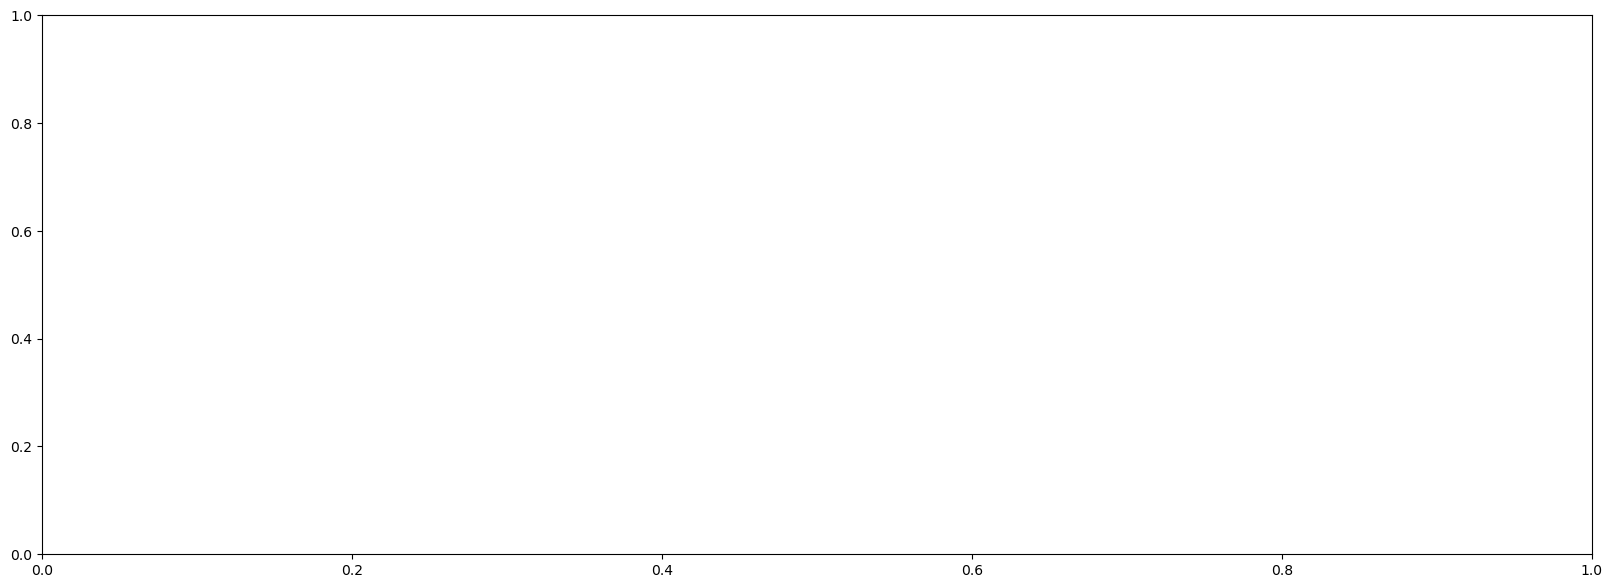

In [ ]:

nome = 'Acurácia_{}'.format(date)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
axes = axes.flatten()

for i in range(len(historico)):
    ax = axes[i]
    ax.set_title(f'Acurácia - Treino {i + 1}')
    ax.plot(historico[i].history['accuracy'], label='Treino')
    ax.plot(historico[i].history['val_accuracy'], label='Validação')
    ax.set_xlabel('Épocas')
    ax.set_ylabel('Acurácia')
    ax.set_ylim(0, 1)
    ax.legend()

plt.suptitle('Acurácia {}'.format(date))
plt.savefig('Plots/%s' % arq)
plt.tight_layout()